In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("../data/bikes.csv")
df.date = pd.to_datetime(df.date)
df.head()

,Unnamed: 0,tripid,userid,bikeid,account,bikenumber,start_time,end_time,start_lat,start_lng,end_lat,end_lng,date
0,1,33838,13452,382,AR,6631000433,2019-01-01 06:46:03,2019-01-01 06:46:03,52.296065,4.787667,52.296200,4.787679,2019-01-01 06:46:00
1,2,33839,13452,812,AR,6631000146,2019-01-01 06:47:39,2019-01-01 06:47:39,52.295938,4.788336,52.295940,4.788557,2019-01-01 06:47:35
2,3,33851,13182,238,AR,6631000443,2019-01-01 14:15:36,2019-01-01 14:15:36,52.307337,4.807633,52.307336,4.807630,2019-01-01 14:15:32
3,4,33852,13182,238,AR,6631000443,2019-01-01 14:33:50,2019-01-01 14:33:50,52.308478,4.809970,52.308537,4.810099,2019-01-01 14:33:46
4,5,33867,12674,787,AG,6631000283,2019-01-01 20:11:05,2019-01-01 20:11:05,52.506522,4.727323,52.506809,4.732135,2019-01-01 20:11:01


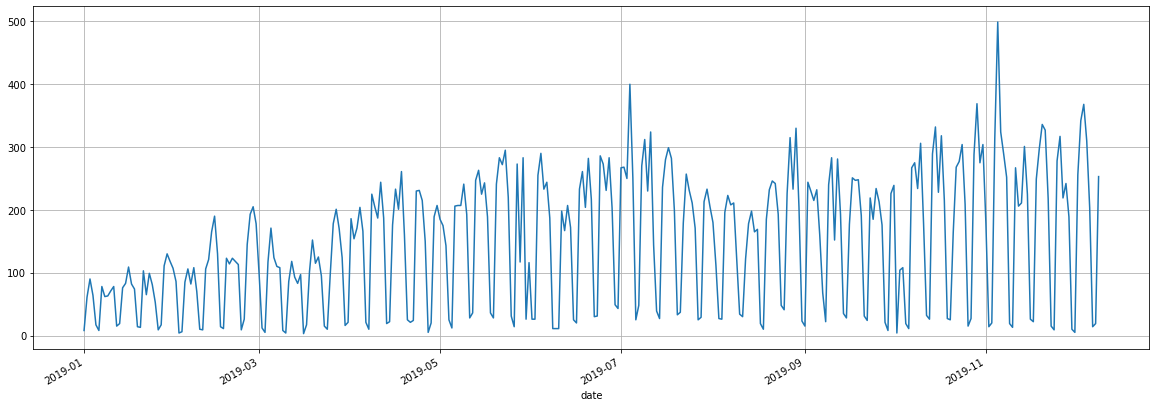

In [3]:
df_days = df['date'].groupby(df.date.dt.floor('d')).count()
df_days.plot(figsize=[20,7])
plt.grid()

# Invloed dag van de week

Text(0.5, 1.0, 'Gemiddeld aantal fietsen verhuurd per weekdag')

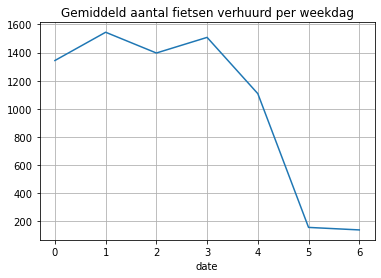

In [4]:
df_weekdays = df['date'].groupby(df.date.dt.weekday).count()
df_weekdays /= len(df_weekdays)
df_weekdays.plot()
plt.grid()
plt.title("Gemiddeld aantal fietsen verhuurd per weekdag")

# Invloed weer

In [5]:
# Read File
df_weather = pd.read_csv('KNMI_20191231.txt', sep=",", header=None)
df_weather.columns = ['location_id','date','temp_max','rain_sum']

df_weather["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
# Convert 0.1 to 1
df_weather['temp_max'] = df_weather['temp_max'] /10

df_weather.head()

,location_id,date,temp_max,rain_sum
0,240,2019-01-01 06:46:00,9.1,5
1,240,2019-01-01 06:47:35,7.1,-1
2,240,2019-01-01 14:15:32,6.8,-1
3,240,2019-01-01 14:33:46,6.8,-1
4,240,2019-01-01 20:11:01,8.1,1
